In [ ]:
! pip install xarray numpy matplotlib datetime cartopy


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [datetime]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [46]:
#see the different files
import os

def list_files(path):
    file_list = []
    file_dict = {}
    if os.path.exists(path):
        for root, dirs, files in os.walk(path):
            #print(f"Folder:{root}")
            if len(files) > 0:
                file_dict[root] = files

            # if len(files) > 0:
            #     for file in files:
            #         #print(f"File:{file}\n")
            #         file_list.append(root+"/"+file)
        return file_dict
        #return file_list
    else:
        print("Path does not exists")
    

files = list_files("dataset/")
print(files)

{'dataset/chlorophyll': ['AQUA_MODIS.20251001.L3m.DAY.CHL.chlor_a.4km.NRT.nc', 'AQUA_MODIS.20251004.L3m.DAY.CHL.chlor_a.4km.NRT.nc', 'AQUA_MODIS.20250215.L3m.DAY.CHL.chlor_a.4km.nc', 'AQUA_MODIS.20251002.L3m.DAY.CHL.chlor_a.4km.NRT.nc', 'AQUA_MODIS.20251003.L3m.DAY.CHL.chlor_a.4km.NRT.nc'], 'dataset/night-time-temp': ['AQUA_MODIS.20250215.L3m.DAY.SST4.sst4.4km.nc', 'AQUA_MODIS.20251003.L3m.DAY.SST4.sst4.4km.NRT.nc', 'AQUA_MODIS.20251002.L3m.DAY.SST4.sst4.4km.NRT.nc', 'AQUA_MODIS.20251001.L3m.DAY.SST4.sst4.4km.NRT.nc'], 'dataset/inorganic-carbon': ['AQUA_MODIS.20250215.L3m.DAY.PIC.pic.4km.nc', 'AQUA_MODIS.20251001.L3m.DAY.PIC.pic.4km.NRT.nc', 'AQUA_MODIS.20251003.L3m.DAY.PIC.pic.4km.NRT.nc', 'AQUA_MODIS.20251002.L3m.DAY.PIC.pic.4km.NRT.nc'], 'dataset/day-time-temp': ['AQUA_MODIS.20250215.L3m.DAY.SST.sst.4km.nc', 'AQUA_MODIS.20251003.L3m.DAY.SST.sst.4km.NRT.nc', 'AQUA_MODIS.20251001.L3m.DAY.SST.sst.4km.NRT.nc', 'AQUA_MODIS.20251002.L3m.DAY.SST.sst.4km.NRT.nc'], 'dataset/reflectance-469':

In [47]:
#Inspect a data example
import xarray as xr 

a = list_files("dataset/")

for key in a:
    print(f"Folder:{key}")
    print(f"File:{a[key][0]}")
    data = xr.open_dataset(key + "/" + a[key][0])
    print(f"Data:{data}")


Folder:dataset/chlorophyll
File:AQUA_MODIS.20251001.L3m.DAY.CHL.chlor_a.4km.NRT.nc
Data:<xarray.Dataset> Size: 149MB
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 149MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/64)
    product_name:                      AQUA_MODIS.20251001.L3m.DAY.CHL.chlor_...
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    source:                            satellite observations from MODIS-Aqua
    ...                                ...
    identifier_product_doi

In [48]:
#lets look at the attiributes of 1 example
example_data = xr.open_dataset(key + "/" + a[key][0])
print(example_data.attrs)

{'product_name': 'AQUA_MODIS.20251003.L3m.DAY.RRS.Rrs_469.4km.NRT.nc', 'instrument': 'MODIS', 'title': 'MODISA Level-3 Standard Mapped Image', 'project': 'Ocean Biology Processing Group (NASA/GSFC/OBPG)', 'platform': 'Aqua', 'source': 'satellite observations from MODIS-Aqua', 'temporal_range': 'day', 'processing_version': 'R2022.0.2', 'date_created': '2025-10-04T13:49:38.000Z', 'history': 'l3mapgen par=AQUA_MODIS.20251003.L3m.DAY.RRS.Rrs_469.4km.NRT.nc.param ', 'l2_flag_names': 'ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH,LOWLW,CHLWARN,CHLFAIL,NAVWARN,MAXAERITER,ATMWARN,HISOLZEN,NAVFAIL,FILTER,HIGLINT', 'time_coverage_start': '2025-10-03T00:20:01.810Z', 'time_coverage_end': '2025-10-04T02:59:59.383Z', 'start_orbit_number': 0, 'end_orbit_number': 0, 'map_projection': 'Equidistant Cylindrical', 'latitude_units': 'degrees_north', 'longitude_units': 'degrees_east', 'northernmost_latitude': 90.0, 'southernmost_latitude': -90.0, 'westernmost_longitude': -180.0, 'easternmost_longit

As we can see this image has 6,569,072 data points and has a range between -1.8 and 40. It has longitude,latitude, sst, and qual_sst which we will use.

In [49]:
import numpy as np

example_data = xr.open_dataset("dataset/day-time-temp/AQUA_MODIS.20251001.L3m.DAY.SST.sst.4km.NRT.nc")
#variables
for i in example_data.variables:
    print(i)

#Sea surface temprature
print("-" * 50)
print(example_data['sst'][0:5])
#Quality
print("-" * 50)
print(example_data['qual_sst'][0:5])
#Latitude
print("-" * 50)
print(example_data['lat'].values)
#Longitude
print("-" * 50)
print(example_data['lon'].values)

# Check if all the values are Nan or not
print(np.isnan(example_data['sst'].values).all())
print(np.isnan(example_data['sst'].values).sum()) 

sst
qual_sst
lat
lon
palette
--------------------------------------------------
<xarray.DataArray 'sst' (lat: 5, lon: 8640)> Size: 173kB
[43200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 20B 89.98 89.94 89.9 89.85 89.81
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Sea Surface Temperature
    units:          degree_C
    standard_name:  sea_surface_temperature
    valid_min:      -1000
    valid_max:      10000
    display_scale:  linear
    display_min:    -2.0
    display_max:    45.0
--------------------------------------------------
<xarray.DataArray 'qual_sst' (lat: 5, lon: 8640)> Size: 173kB
[43200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 20B 89.98 89.94 89.9 89.85 89.81
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:  Quality Levels, Sea Surface Temperature
    valid_min:  0
    valid_max:  5
------------------------

In [50]:
#See the first temprature above 5 degree C and its location
sst = example_data['sst'].values
latitudes = example_data['lat'].values
longitudes = example_data['lon'].values

found = False
for lat_idx in range(sst.shape[0]):
    for lon_idx in range(sst.shape[1]):
        value = sst[lat_idx, lon_idx]
        if not np.isnan(value) and value > 5:
            print(f"SST above 5 degree C: {value}")
            print(f"At indices: lat_idx={lat_idx}, lon_idx={lon_idx}")
            print(f"Latitude: {latitudes[lat_idx]}, Longitude: {longitudes[lon_idx]}")
            found = True
            break
    if found:
        break

SST above 5 degree C: 5.349999904632568
At indices: lat_idx=321, lon_idx=4506
Latitude: 76.60416412353516, Longitude: 7.770838737487793


In [51]:
import xarray as xr
import os
from collections import defaultdict

files = list_files("dataset/")
merged_folder = "merged"

if not os.path.exists(merged_folder):
    os.makedirs(merged_folder)

def get_time(file_path):
    data = xr.open_dataset(file_path)
    initial = data.attrs["time_coverage_start"]
    final = data.attrs["time_coverage_end"]
    data.close()
    return initial, final

time_groups = defaultdict(list)
for folder in files:
    for fname in files[folder]:
        if fname.endswith(".nc"):
            initial, final = get_time(os.path.join(folder, fname))
            time_groups[initial].append(os.path.join(folder, fname))

for t, group in time_groups.items():
    if len(group) > 1:
        print(f"Merging {len(group)} files for time period {t}")
        merged = xr.merge([xr.open_dataset(f) for f in group], compat='override')
        outname = f"merged_{t.replace(':','').replace('-','').replace('T','_')}.nc"
        merged.to_netcdf(os.path.join(merged_folder, outname))
        merged.close()
    else:
        print(f"There is only a single file for time period {t}")


#get_time(os.path.join(key, files[key][0]))



Merging 4 files for time period 2025-10-01T00:40:01.169Z
Merging 2 files for time period 2025-10-04T00:05:01.541Z
Merging 4 files for time period 2025-02-15T00:05:00.000Z
Merging 4 files for time period 2025-10-02T00:25:00.897Z
Merging 4 files for time period 2025-10-03T00:20:01.810Z
There is only a single file for time period 2025-02-14T12:30:01.000Z
There is only a single file for time period 2025-10-02T12:00:01.271Z
There is only a single file for time period 2025-10-01T12:05:01.836Z
There is only a single file for time period 2025-09-30T12:20:00.631Z


In [52]:
#Lets see one of our merged files
files = list_files("merged/")
data = xr.open_dataset(os.path.join("merged", files['merged/'][0]))
print(f"----File:{files['merged/'][0]}----")
print(data)

----File:merged_20251002_002500.897Z.nc----
<xarray.Dataset> Size: 747MB
Dimensions:   (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon       (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a   (lat, lon) float32 149MB ...
    palette   (rgb, eightbitcolor) uint8 768B ...
    pic       (lat, lon) float32 149MB ...
    sst       (lat, lon) float32 149MB ...
    qual_sst  (lat, lon) float32 149MB ...
    Rrs_469   (lat, lon) float32 149MB ...
Attributes: (12/64)
    product_name:                      AQUA_MODIS.20251002.L3m.DAY.CHL.chlor_...
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    source:   

As we can see, it has other features as variables in it.

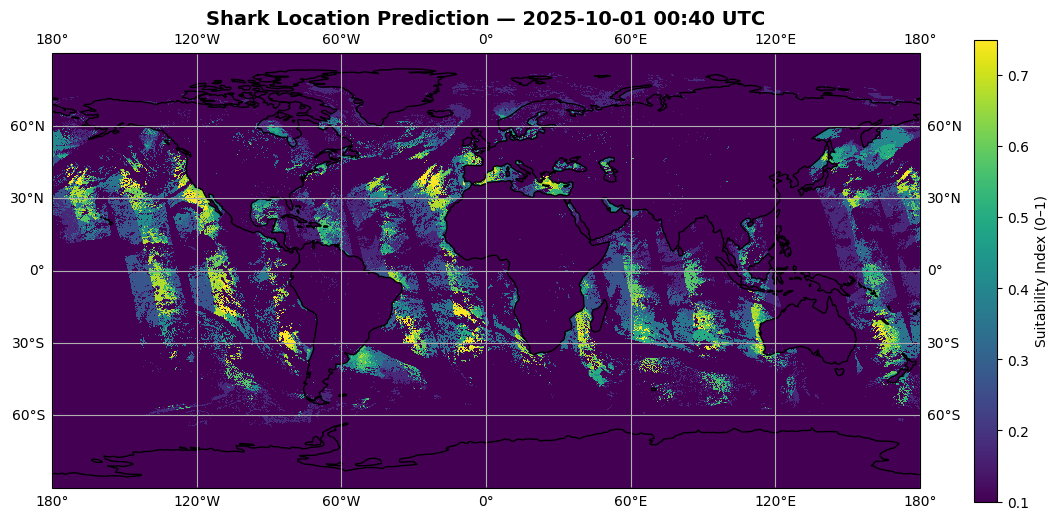

In [ ]:
#Calculate the shark availability
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


#a = list_files("merged/")
#print(a)

input_folder = "merged/"
input_file = "merged_20250215_000500.000Z.nc"
output_folder = "shark_availability/"

if not os.path.exists(input_folder):
    print("Input folder does not exists...")

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def chl_suitability(chl):
    s = xr.where((chl >= 0.05) & (chl <= 0.15), 1.0, 0.0)
    s = xr.where((chl > 0.15) & (chl <= 0.4), 0.7, s)
    s = xr.where(chl > 0.4, 0.3, s)
    return s

def pic_suitability(pic):
    s = xr.where((pic >= 0.1) & (pic <= 0.3), 1.0, 0.0)
    s = xr.where(pic < 0.1, 0.6, s)
    s = xr.where(pic > 0.3, 0.4, s)
    return s

def sst_suitability(sst):
    s = xr.where((sst >= 16) & (sst <= 24), 1.0, 0.0)
    s = xr.where(((sst >= 12) & (sst < 16)) | ((sst > 24) & (sst <= 28)), 0.7, s)
    s = xr.where((sst < 12) | (sst > 28), 0.3, s)
    return s

def rsr_469(rrs):
    s = xr.where((rrs >= 0.002) & (rrs <= 0.005), 1.0, 0.0)
    s = xr.where(((rrs >= 0.001) & (rrs < 0.002)) | ((rrs > 0.005) & (rrs <= 0.008)), 0.7, s)
    s = xr.where((rrs < 0.001) | (rrs > 0.008), 0.3, s)
    return s

w_chl = 0.35
w_pic = 0.25
w_sst = 0.1
w_rsr = 0.4

data = xr.open_dataset(input_folder + input_file)
chl_s = chl_suitability(data['chlor_a'])
pic_s = pic_suitability(data['pic'])
sst_s = sst_suitability(data['sst'])
rsr_s = rsr_469(data['Rrs_469'])

try:
    time_str = data.attrs["time_coverage_start"]
    time_fmt = datetime.datetime.fromisoformat(time_str.replace("Z", "+00:00")).strftime("%Y-%m-%d %H:%M UTC")

except:
    time_fmt = data.attrs.get("time_coverage_start")

habitat_suitability = (chl_s + pic_s + sst_s ) / 3.0

#Formula with weights (non-scientific)
habitat_suitability = (chl_s * w_chl + pic_s * w_pic + sst_s * w_sst + rsr_s * w_rsr)

habitat_suitability = (chl_s  + pic_s + sst_s + w_rsr  )/4


habitat_suitability = xr.where(habitat_suitability > 1, 1, habitat_suitability)
habitat_suitability = xr.where(habitat_suitability < 0, 0, habitat_suitability)
habitat_masked = habitat_suitability.where(habitat_suitability > 0) 
#habitat_masked = habitat_suitability.where(habitat_suitability > 0.3) # Mask values below 0.3


output_file = f"{output_folder}shark_habitat_suitability {input_file}"
habitat_suitability.to_netcdf(output_file)

#Under this part is created with the help uf ChatGPT
plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
img = habitat_masked.plot(
    ax=ax,
    cmap='viridis',
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label': 'Suitability Index (0–1)'},
    add_colorbar=True
)

# Add map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add title
plt.title(f"Shark Location Prediction — {time_fmt}", fontsize=14, weight='bold')
plt.show()